<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/Covid_Classification2_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!wget https://www.dropbox.com/sh/u98tzg3xfii3m9i/AACYPZMyhusI5Eh9pDiM5rIRa?dl=0

--2021-05-10 20:58:33--  https://www.dropbox.com/sh/u98tzg3xfii3m9i/AACYPZMyhusI5Eh9pDiM5rIRa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/u98tzg3xfii3m9i/AACYPZMyhusI5Eh9pDiM5rIRa [following]
--2021-05-10 20:58:33--  https://www.dropbox.com/sh/raw/u98tzg3xfii3m9i/AACYPZMyhusI5Eh9pDiM5rIRa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd645776ef70c49baa6c3565869.dl.dropboxusercontent.com/zip_download_get/AxqOcPvTCchmnVKWOJRaGN9W9u-tcYvAP2qwUK6j7mdXWse9KMb7EHvXGqh43u9ZgoTFT8-WaLyXx7oSGqEBHGXv-E0nBVeDlEtYXTg2YYzvHg [following]
--2021-05-10 20:58:39--  https://ucd645776ef70c49baa6c3565869.dl.dropboxusercontent.com/zip_download_get/AxqOcPvTCchmnVKWOJRaGN9W9u-tcYvAP2qwUK6j7mdXWse9KMb7EHvXGqh43u9ZgoTFT8-WaLyXx7oSG

In [22]:
!unzip AACYPZMyhusI5Eh9pDiM5rIRa?dl=0

Archive:  AACYPZMyhusI5Eh9pDiM5rIRa?dl=0
mapname:  conversion of  failed
replace Val/Covid/COVID_val_5.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Val/Covid/COVID_val_5.jpg  
replace Val/Covid/COVID_val_4.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yy
 extracting: Val/Covid/COVID_val_4.jpg  
replace Val/Covid/COVID_val_2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Val/Covid/COVID_val_2.jpg  
replace Val/Covid/COVID_val_3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Val/Covid/COVID_val_3.jpg  
replace Val/Covid/COVID_val_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Val/Covid/COVID_val_1.jpg  
replace Val/Covid/COVID_val_7.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Val/Covid/COVID_val_7.jpg  
replace Val/Covid/COVID_val_9.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [7]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    # rotation_range=20,
    # width_shift_range=0.1,
    # shear_range=0.1,
    # zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [8]:
train = image_generator.flow_from_directory('Train', 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(224, 224))

validation = image_generator.flow_from_directory('Val', 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(224, 224))

test = image_generator.flow_from_directory('Test', 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(224, 224))

Found 5581 images belonging to 2 classes.
Found 1822 images belonging to 2 classes.
Found 1635 images belonging to 2 classes.


In [9]:
train.target_size

(224, 224)

In [10]:
num_covid=len(os.listdir(os.path.join('Train', 'Covid')))
num_normal=len(os.listdir(os.path.join('Train', 'Normal')))

In [11]:
weight_for_0 = num_covid / (num_normal + num_covid)
weight_for_1 = num_normal / (num_normal + num_covid)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.50
Weight for class 1: 0.50


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 54, 54, 64)       

In [17]:
r = model.fit(
    train, 
    epochs=8,
    validation_data=validation, 
    validation_steps=20,
)

Epoch 1/8
698/698 [==============================] - 42s 59ms/step - loss: 0.0181 - accuracy: 0.9955 - val_loss: 0.0841 - val_accuracy: 0.9500
Epoch 2/8
698/698 [==============================] - 41s 59ms/step - loss: 0.0100 - accuracy: 0.9962 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 3/8
698/698 [==============================] - 42s 60ms/step - loss: 0.0249 - accuracy: 0.9943 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 4/8
698/698 [==============================] - 44s 63ms/step - loss: 0.0323 - accuracy: 0.9910 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 5/8
698/698 [==============================] - 42s 60ms/step - loss: 0.0155 - accuracy: 0.9952 - val_loss: 0.0918 - val_accuracy: 0.9500
Epoch 6/8
698/698 [==============================] - 42s 60ms/step - loss: 0.0201 - accuracy: 0.9944 - val_loss: 0.0947 - val_accuracy: 0.9500
Epoch 7/8
698/698 [==============================] - 43s 61ms/step - loss: 0.0197 - accuracy: 0.9943 - val_loss: 0.0040 - val_accuracy: 1.0000

Text(0.5, 1.0, 'Accuracy Evolution')

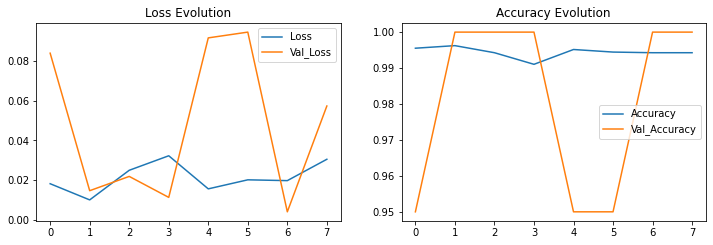

In [18]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [19]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

1635/1635 [==============================] - 9s 6ms/step - loss: 0.4529 - accuracy: 0.9260
Test Accuracy: 92.60%
698/698 [==============================] - 38s 54ms/step - loss: 0.0152 - accuracy: 0.9946
Train Accuracy: 99.46%


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

[[645  60]
 [ 61 869]]


,0,1,accuracy,macro avg,weighted avg
precision,0.913598,0.935414,0.925994,0.924506,0.926007
recall,0.914894,0.934409,0.925994,0.924651,0.925994
f1-score,0.914245,0.934911,0.925994,0.924578,0.926000
support,705.000000,930.000000,0.925994,1635.000000,1635.000000


In [23]:
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


In [1]:
r = model2.fit(
    train, 
    epochs=10,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=788,
    validation_steps=25,
)

NameError: ignored